Peak Concentration: 21.58mg
Estimated Steady State Concentration: 16.62mg
Resting Concentration: 11.66mg
Number of Half-lives Between Doses: 0.89


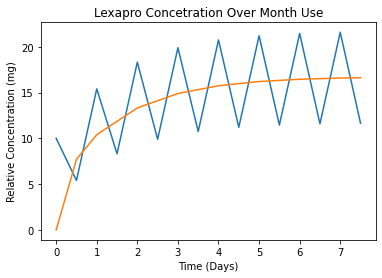

In [62]:
"""Desired Inputs"""
# Drug: Drug Name, Average Half-life
# Timing: Daily Dose Frequency, Period of Use
# Dosage: Dose per Day, Initial Concentration in System

# Total Inputs: 6

"""Desired Outputs"""
# Peak Concentration
# Resting Concentration
# Estimated Steady_State Concentration
# Number of Half-lives Between Doses
# Plot of concentration over time vs steady state

# Total Outputs: 5

"""Additional Features"""
# Database of drugs for drop down menu that encodes drug name and half-life
# Logs of prior calculations accessable by the user to inform new calculations


from matplotlib import pyplot as plt


"""Returns Half-life Based on Formula"""
def halflife(hl, dose, time, initial=0):
    # hl = Average Half-life
    # dose = Dose
    # time = Time since Dose
    # initial = Current system concentration at time of dose
    
    current_con = (initial+dose) * ((1/2)**(time/hl))
    return current_con

"""Returns Primary Datasets to Calculate Outputs"""
def hl_calcs(drug_name, hl, dose, time_interval=1, time_period=30, initial=0):
    # drug_name = Obvious
    # hl = Average Half-life
    # dose = Obvious
    # time_interval = Daily dose frequency
    # time_period = Duration of drug usage in days
    # initial = Current system concentration at time of dose
    
    # Yields dose schedule by hour
    dose_schedule = [i for i in range(0, time_period*24, int(time_interval*24))]
    
    # Yields drug concentration based on dose to half-life cycles for the duration of the dose schedule
    i = 1
    concentration_interval = [dose+initial, halflife(hl, dose, time_interval*24, initial)]
    while len(dose_schedule)*2 >= len(concentration_interval):
        concentration_interval.append(concentration_interval[i] + dose)
        concentration_interval.append(halflife(hl, concentration_interval[i+1], 24*time_interval, initial))
        i += 2
    
    # Yields ordered time-points for plotting based on time-period and dose frequency
    time_points = [(i*time_interval)/2 for i in range(len(concentration_interval))]
    
    # Yields list of average peak to trough concentrations each day as an estimate of steady state concentration
    steady_state_plot = [initial]+[(concentration_interval[i] + concentration_interval[i+1])/2 for i in range(len(concentration_interval)-1)]
    
    # Yields number of half-lives between doses based on time-interval
    num_hls = round((time_interval*24)/hl, 2)
    
    return drug_name, time_points, concentration_interval, steady_state_plot, num_hls

# Test lexapro 10mg usage run followed by dose frequency increase
name, schedule, concentration, steady_state, half_lives = hl_calcs("Lexapro", 27, 10, time_period=7)

# Numeric output final calculations
peak_concentration = round(max(concentration), 2)
estimated_steady_state = round(max(steady_state), 2)
resting_concentration = round(concentration[-1], 2)

# Outputs
print("Peak Concentration: " + str(peak_concentration) + "mg")
print("Estimated Steady State Concentration: " + str(estimated_steady_state) + "mg")
print("Resting Concentration: " + str(resting_concentration) + "mg")
print("Number of Half-lives Between Doses: " + str(half_lives))

plt.plot(schedule, concentration)
plt.plot(schedule, steady_state)
plt.title(f"{name} Concetration Over Month Use")
plt.xlabel("Time (Days)")
plt.ylabel("Relative Concentration (mg)")
plt.show()